In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tabula

In [4]:
def create_median_df(table_list, col_names):
    '''extract the median of each sample to a new column
    Args:
    - table_list: seq. of panda df
    - col_names: seq of str names
    
    return dataframe with median
    '''
    
    df = pd.DataFrame()
    for table, col in zip(table_list, col_names):
        df['median_'+ col] = table.median(1)
    return df

In [5]:
def plot_corr(data):
    '''
    Plot correlation 
    
    Args:
    - data: pd dataframe
    
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(5, 5))
        ax = sns.heatmap(corr, square=True, cmap='RdBu_r', center=0)


In [6]:
magnetic_pdf = os.path.join(os.path.dirname(os.getcwd()), '../Data/Raw_data/MagneticMethods_Report.pdf')

In [7]:
tables = tabula.read_pdf(magnetic_pdf, pages=[10,11,12,13], lattice=True, pandas_options={'header':1})

In [8]:
hard_ref = tabula.read_pdf(magnetic_pdf, pages=[5], lattice=True)[0] #get the reference hardness table

In [9]:
#Cleaning tables
for i, df in enumerate(tables):
    df.drop(0, inplace=True)
    df.rename(columns = {'Unnamed: 0':'Sample'}, inplace=True)
    
    if i in range(6,9):
        df.Sample = df.Sample.str.replace('P91', 'T')
        
    if i >= 9:
        df.Sample = df.Sample.str.replace('B', 'T_B')
        
    df.Sample = df.Sample.str.replace('91', '')
    df.set_index(df.iloc[:,0], inplace=True, drop=True)
    df.drop('Sample', axis=1, inplace=True)


In [10]:
pipes = tables[0:6] # 1)ground (g) followed by 2)unground (ug) for coercive field (CF), permability (perm), MBN
tubes = tables[6:9] # CF, perm, MBN for first 3 = ID
B_tubes = tables[9:] # CF, perm, MBN for last 3 = Unknown

In [11]:
#Extracting CSV
table_names = ['PIPE_magnetic_CF_ground', 'PIPE_magnetic_CF_unground', 'PIPE_magnetic_Perm_ground', 'PIPE_magnetic_Perm_unground', 'PIPE_magnetic_MBN_ground', 'PIPE_magnetic_MBN_unground',\
              'TUBE_magnetic_CF', 'TUBE_magnetic_Perm', 'TUBE_magnetic_MBN', 'TUBE_blind_magnetic_CF', 'TUBE_blind_magnetic_Perm', 'TUBE_blind_magnetic_MBN']

for table, name in zip(tables, table_names):
    table.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Intermediate_data/'+name+'.csv'))
    

In [12]:
table_names_boxplot = ['pipe_CF_g', 'pipe_CF_ug', 'pipe_perm_g', 'pipe_perm_ug', 'pipe_MBN_g', 'pipe_MBN_ug',\
              'CF', 'perm', 'MBN', 'CF', 'perm', 'MBN']

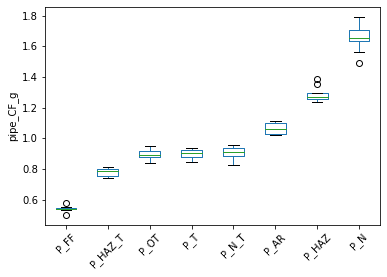

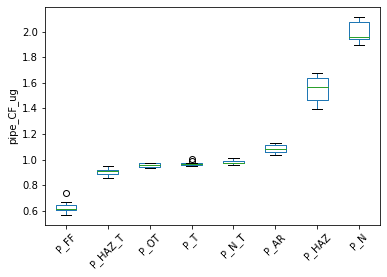

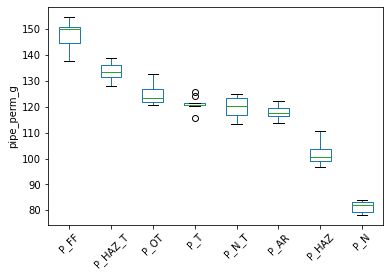

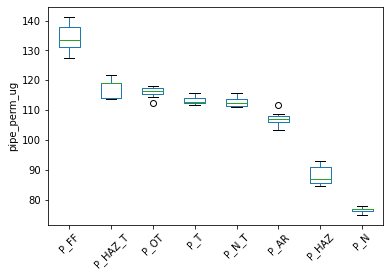

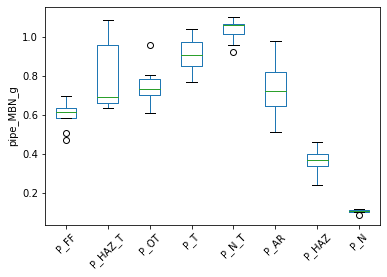

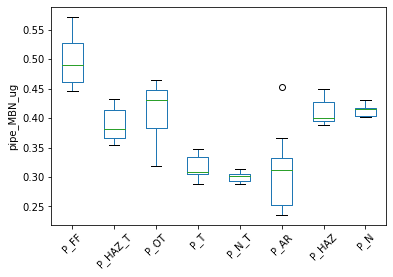

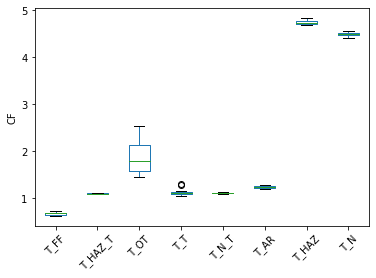

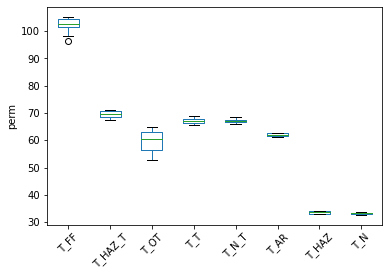

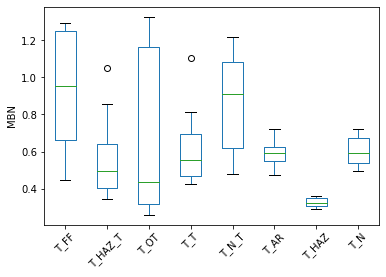

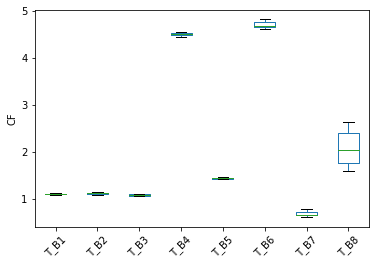

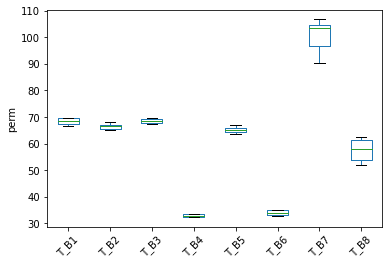

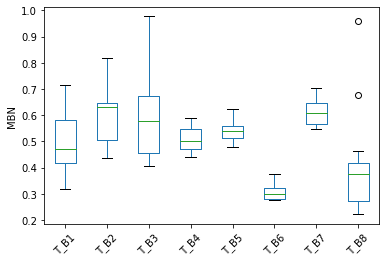

In [13]:
#boxplot
for table, name in zip(tables, table_names_boxplot):
    data = table.transpose().astype('float')
    data.plot.box(rot=45, ylabel=name)

In [14]:
column_tubes = table_names_boxplot[6:9]
median_tubes = create_median_df(tubes, column_tubes)
column_b_tubes = table_names_boxplot[9:]
median_b_tubes = create_median_df(B_tubes, column_b_tubes)
median_all_tubes = pd.concat([median_b_tubes, median_tubes], ignore_index=False)

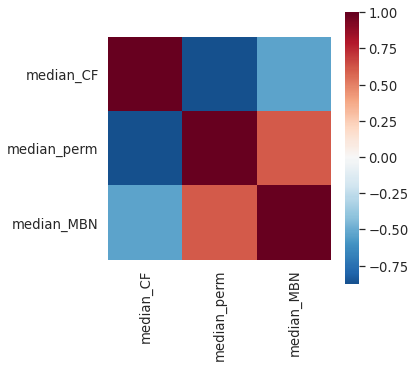

In [15]:
plot_corr(median_all_tubes)

In [66]:
median_all_tubes.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Cleaned_data/TUBE_magnetic_param_median.csv'))

In [16]:
column_pipes = table_names_boxplot[0:6]
median_pipes = create_median_df(pipes, column_pipes)
median_g_pipes = median_pipes.loc[:, median_pipes.columns.str.contains('_g')]

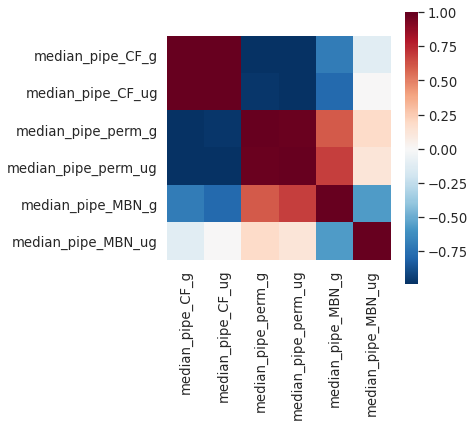

In [17]:
plot_corr(median_pipes)

In [88]:
median_g_pipes.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Cleaned_data/PIPE_magnetic_param_median.csv'))